# COMMENT

I had tried to create an Model skeleton.

There is a lot more can be done to improve accuracy such as other model; SNN, CNN, RNN.

Due to time constrain I had created only one model using LSTM.

# IMPORT LIBRARIES

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from numpy import array
from numpy import asarray
from numpy import zeros

from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers.core import Activation, Dropout, Dense


from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from sklearn.model_selection import train_test_split


------------

# IMPORT DATASET

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [21]:
import pandas as pd
dataset = pd.read_csv('/content/gdrive/MyDrive/NOVA_Sentiment_Analysis.csv')

In [22]:
dataset.Tweets = dataset.Tweets.astype(str)

In [23]:
dataset.head()

,Unnamed: 0,Tweets,Sbjectivity_Scale,Polarity_Scale,Sentiment_Tags
0,0,hepburn say,0.000000,0.00000,Neutral
1,1,plus i ve add commercial experience tacky,0.000000,0.00000,Neutral
2,2,today must mean need take another trip,0.687500,-0.31250,Negative
3,3,really aggressive blast obnoxious entertainmen...,0.350000,0.00625,Positive
4,4,really big bad thing,0.383333,-0.35000,Negative


In [24]:
# Drop unwanted Columns:
dataset.drop(['Unnamed: 0', 'Sbjectivity_Scale', 'Polarity_Scale'], axis = 1, inplace = True)
dataset.head()

,Tweets,Sentiment_Tags
0,hepburn say,Neutral
1,plus i ve add commercial experience tacky,Neutral
2,today must mean need take another trip,Negative
3,really aggressive blast obnoxious entertainmen...,Positive
4,really big bad thing,Negative


In [25]:
dataset.head()

,Tweets,Sentiment_Tags
0,hepburn say,Neutral
1,plus i ve add commercial experience tacky,Neutral
2,today must mean need take another trip,Negative
3,really aggressive blast obnoxious entertainmen...,Positive
4,really big bad thing,Negative


In [26]:
# ENCODING
dataset['Sentiment_Tags'].replace(['Negative', 'Neutral', 'Positive'], [0, 1, 2], inplace = True)

In [27]:
y = np.array(dataset['Sentiment_Tags'])

In [28]:
X = dataset['Tweets']

In [32]:
# SPLIT DATASET INTO TRAIN_TEST_SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.20,
                                                    random_state = 422)

----

# EMBEDDING LAYER

## WORD-TO-INDEX TOKENIZER

In [36]:
w2i_tokenizer = Tokenizer(num_words = 5555)
w2i_tokenizer.fit_on_texts(X_train)

X_train = w2i_tokenizer.texts_to_sequences(X_train)
X_test = w2i_tokenizer.texts_to_sequences(X_test)

## CREATE VOCABULARY

In [37]:
# For reserved 0 index we will use + 1
vocab_size = len(w2i_tokenizer.word_index) + 1

maxlen = 111

X_train = pad_sequences(X_train, padding = 'post', maxlen = maxlen)
X_test = pad_sequences(X_test, padding = 'post', maxlen = maxlen)

## CREATE EMBEDDED DICTIONARY

In [40]:
embedded_dict = dict()

gloVe_file = open('/content/gdrive/MyDrive/glove.6B.100d.txt')

for tweet in gloVe_file:
    records = tweet.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embedded_dict [word] = vector_dimensions
gloVe_file.close()

## EMBED MATRIX

In [41]:
embed_matrix = zeros((vocab_size, 100))
for word, index in w2i_tokenizer.word_index.items():
    embed_vector = embedded_dict.get(word)
    if embed_vector is not None:
        embed_matrix[index] = embed_vector

In [42]:
from tensorflow.keras.layers import LSTM

## CREATE SEQUENTIAL MODEL

In [43]:
lstm_model = Sequential()
embed_layer = Embedding(vocab_size, 100, weights=[embed_matrix], input_length = maxlen , trainable = False)
lstm_model.add(embed_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [44]:
print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 111, 100)          338600    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 455,977
Trainable params: 117,377
Non-trainable params: 338,600
_________________________________________________________________
None


# FIT MODEL

In [46]:
# Code to Measure time taken by program to execute.
import time
# store starting time
begin = time.time()

# program body starts

fit_model_lstm = lstm_model.fit(X_train, y_train, batch_size = 111, epochs = 6, verbose = 1, validation_split = 0.2)
model_scores = lstm_model.evaluate(X_test, y_test, verbose = 1)

# program body ends

time.sleep(1)
# store end time
end = time.time()
# total time taken
print(f"Total runtime(sec) of the program is {end - begin}")

Epoch 1/6
12/12 [==============================] - 4s 335ms/step - loss: -3.3195 - acc: 0.4086 - val_loss: -5.3787 - val_acc: 0.3500
Epoch 2/6
12/12 [==============================] - 4s 333ms/step - loss: -3.5602 - acc: 0.4086 - val_loss: -5.7567 - val_acc: 0.3500
Epoch 3/6
12/12 [==============================] - 4s 337ms/step - loss: -3.7835 - acc: 0.4086 - val_loss: -6.1325 - val_acc: 0.3500
Epoch 4/6
12/12 [==============================] - 4s 335ms/step - loss: -4.0230 - acc: 0.4086 - val_loss: -6.4812 - val_acc: 0.3500
Epoch 5/6
12/12 [==============================] - 4s 338ms/step - loss: -4.2579 - acc: 0.4086 - val_loss: -6.8168 - val_acc: 0.3500
Epoch 6/6
13/13 [==============================] - 0s 35ms/step - loss: -4.6752 - acc: 0.3850
Total runtime(sec) of the program is 42.71188735961914


In [48]:
print("Testing Score:", model_scores[0])
print("Testing Accuracy:", model_scores[1])

Testing Score: -4.675222873687744
Testing Accuracy: 0.38499999046325684


Model needs more tuning to enhance accuracy.

In [ ]:
pip install gensim

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [57]:
bag_vectorizer = CountVectorizer(max_df = 0.90, min_df = 2, max_features = 1000, stop_words = "english")
bag_of_word = bag_vectorizer.fit_transform(dataset['Tweets'])
bag_of_word

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 12530 stored elements in Compressed Sparse Row format>

In [58]:
bag_of_word.shape

(2000, 1000)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_word, 
                                                    dataset['Sentiment_Tags'],
                                                    test_size = 0.20,
                                                    random_state = 422)

# NAIVE BAYES CLASSIFIER

In [60]:
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB

naive_model = MultinomialNB().fit(X_train, y_train)
model_prediction = naive_model.predict(X_test)

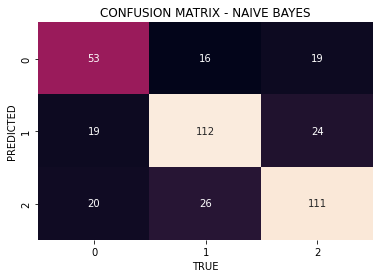

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

con_matrix = confusion_matrix(y_test, model_prediction)
sns.heatmap(con_matrix.T, annot = True, fmt = "d", cbar = False)

plt.xlabel('TRUE')
plt.ylabel('PREDICTED')
plt.title('CONFUSION MATRIX - NAIVE BAYES')
plt.show()

In [64]:
con_matrix

array([[ 53,  19,  20],
       [ 16, 112,  26],
       [ 19,  24, 111]])

In [65]:
A_MNNB = pd.DataFrame(con_matrix[0:1, :1])
B_MNNB = pd.DataFrame(con_matrix[1:2, 1:2])
C_MNNB = pd.DataFrame(con_matrix[2:3, 2:3])

cm_sum_MNNB = np.sum(con_matrix)

cf_sum_MNNB = A_MNNB + B_MNNB + C_MNNB

print("Accuracy: ", (cf_sum_MNNB / cm_sum_MNNB) * 100)

Accuracy:        0
0  69.0
